In [1]:
! ls

'CLEAN FusionEPalumniDB_v20241018_anonymous.xlsx'  'DA FUSION-EP.ipynb'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

plt.rc('font',family = 'serif')
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
# For simplicity, I am going to take the cross-regional countries into their 
# major territorial area; z.B.: Russia (Europe/Asia) --> Asia.
regions = {
    # LATAM
    'Argentina': 'LATAM',
    'Brazil': 'LATAM',
    'Colombia': 'LATAM',
    'Costa Rica': 'LATAM',
    'Guatemala': 'LATAM',
    'Mexico': 'LATAM',
    'Panama': 'LATAM',

    # Europe
    'Albania': 'Europe',
    'Armenia': 'Asia',
    'Belgium': 'Europe',
    'Bulgaria': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Lithuania': 'Europe',
    'Montenegro': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Russia': 'Asia',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Spain': 'Europe',
    'Turkey': 'Asia',
    'UK': 'Europe',
    'United Kingdom': 'Europe',
    'Ukraine': 'Europe',

    # Asia
    'Bangladesh': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Lebanon': 'Asia',
    'Nepal': 'Asia',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palestine': 'Asia',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Yemen': 'Asia',

    # Africa
    'Egypt': 'Africa',
    'Ethiopia': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    'Uganda': 'Africa',

    # North America
    'Canada': 'North America',
    'USA': 'North America',
    'United States': 'North America',
    'Canada/Ecuador': 'North America',  # undergrad done in Canada

    # Oceania
    'New Zealand': 'Oceania',
}

In [4]:
df = pd.read_excel("CLEAN FusionEPalumniDB_v20241018_anonymous.xlsx")
df.drop(labels=['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)
df["Country of Origin"] = df["Country of Origin"].str.title()
df["Country of Origin"] = df["Country of Origin"].str.replace("Usa","USA")
df.insert(3, "Region", df["Country of Origin"].map(regions))
df["gender"] = df["M/F/NB"].map({"M":"Male", "F":"Female", "NB":"Non-Binary"})

In [5]:
print(f"Male: {round(len(df[df['M/F/NB'].isin(['M'])])*100/len(df), 2)}%\n"+
      f"Female: {round(len(df[df['M/F/NB'].isin(['F'])])*100/len(df), 2)}%\n"+
      f"Non-Binary: {round(len(df[df['M/F/NB'].isin(['NB'])])*100/len(df), 2)}%\n")

Male: 78.99%
Female: 21.01%
Non-Binary: 0.0%



In [6]:
df[(df["M/F/NB"].isin(['F'])) & (df["Country of Origin"].isin(['Mexico']))]

,M/F/NB,Cohort (start date),Country of Origin,Region,Alma Mater,Bachelor or Master degree,PhD,YoB,Scholarship provider,Distinction,gender
178,F,2016,Mexico,LATAM,Universidad Nacional Autonoma de México,BSc. in Physics,O,1994.0,Consortium 100 %,Pass,Female
201,F,2021,Mexico,LATAM,"U. Jesuita de Guadalajara, Mexico",BSc. Nanotechnology engineering,Yes,NaN,EACEA,NaN,Female


In [7]:
# Defining colors per gender
colors = {'Female': 'r', 'Male': 'k', 'Non-Binary': 'b'}

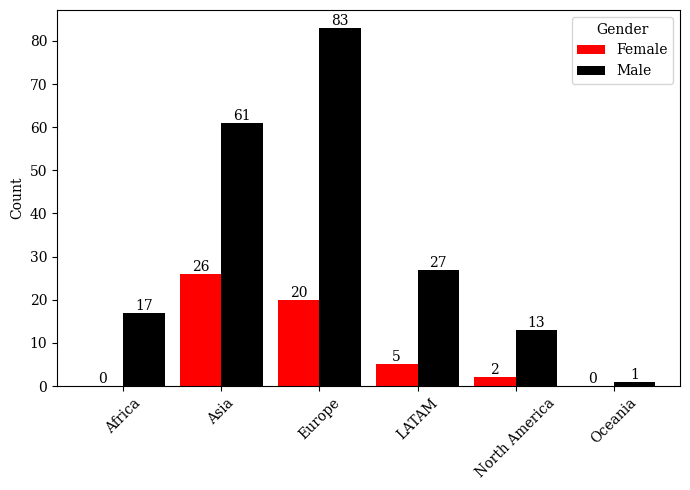

In [8]:

grouped = df.groupby(['Region', 'gender']).size().unstack()

# Create a bar plot
ax = grouped.plot(kind='bar', figsize=(7, 5), stacked=False,
                 color=[colors[col] for col in grouped.columns], width=0.85)

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

In [9]:
LATAM = df[df["Region"].isin(["LATAM"])]
grouped_LATAM = LATAM.groupby(['Country of Origin', 'gender']).size().unstack()

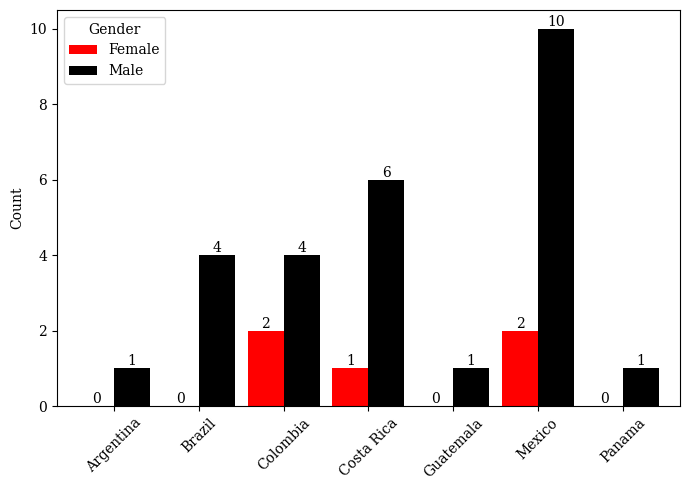

In [10]:
# Create a bar plot
ax = grouped_LATAM.plot(kind='bar', figsize=(7, 5), stacked=False,
                 color=[colors[col] for col in grouped.columns], width=0.85)

# Add numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()